**Batch 5 - Wheat seeds dataset**

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

####Dataset


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('/content/seeds_dataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
print(data)

     15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
..     ...    ...     ...    ...    ...    ...    ... ..
178  12.21  13.47  0.8453  5.357  2.893  1.661  5.178  3
179  11.41  12.95  0.8560  5.090  2.775  4.957  4.825  3
180  12.46  13.41  0.8706  5.236  3.017  4.987  5.147  3
181  12.19  13.36  0.8579  5.240  2.909  4.857  5.158  3
182  11.65  13.07  0.8575  5.108  2.850  5.209  5.135  3

[183 rows x 8 columns]


In [8]:
data.describe()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
count,183.000000,183.000000,183.000000,183.000000,183.00000,183.000000,183.000000,183.000000
mean,15.247705,14.747486,0.872221,5.691148,3.30618,3.552837,5.464262,1.863388
std,2.885473,1.284392,0.023685,0.436285,0.37600,1.440893,0.499501,0.775960
min,10.740000,12.570000,0.808100,4.902000,2.64100,0.765100,4.519000,1.000000
25%,12.710000,13.595000,0.858600,5.349000,2.98450,2.397500,5.088000,1.000000
50%,14.880000,14.570000,0.875000,5.618000,3.32800,3.373000,5.307000,2.000000
75%,18.065000,15.940000,0.888650,6.044000,3.59400,4.609000,5.912000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.03300,7.035000,6.550000,3.000000


In [9]:
data.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [10]:
data.tail()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
178,12.21,13.47,0.8453,5.357,2.893,1.661,5.178,3
179,11.41,12.95,0.8560,5.090,2.775,4.957,4.825,3
180,12.46,13.41,0.8706,5.236,3.017,4.987,5.147,3
181,12.19,13.36,0.8579,5.240,2.909,4.857,5.158,3
182,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15.26   183 non-null    float64
 1   14.84   183 non-null    float64
 2   0.871   183 non-null    float64
 3   5.763   183 non-null    float64
 4   3.312   183 non-null    float64
 5   2.221   183 non-null    float64
 6   5.22    183 non-null    float64
 7   1       183 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 11.6 KB


In [12]:
print(data.shape)

(183, 8)


####Spliting Data

In [13]:
X = data.iloc[:, :-1]
y = data.iloc[:, len(data.columns)-1]

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2)

####Logistic Regression

In [15]:
model1 = LogisticRegression()
model1.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
ypred1 = model1.predict(Xtest)
print(metrics.classification_report(ypred1,ytest))
print("\n\nAccuracy Score:", metrics.accuracy_score(ytest, ypred1).round(2)*100, "%")

              precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



Accuracy Score: 92.0 %


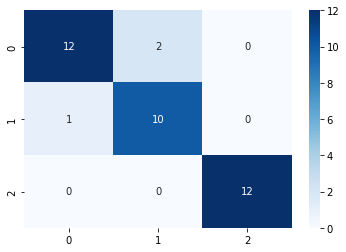

In [17]:
sns.heatmap(confusion_matrix(ytest, ypred1), annot=True,fmt="d",cmap='Blues')

## K Nearest Neighbours

In [18]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [19]:
ypred2 = model2.predict(Xtest)
print(metrics.classification_report(ypred2,ytest))
print("\n\nAccuracy Score:", metrics.accuracy_score(ytest, ypred2).round(2)*100, "%")

              precision    recall  f1-score   support

           1       0.79      0.85      0.81        13
           2       0.91      0.91      0.91        11
           3       0.92      0.85      0.88        13

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.87        37
weighted avg       0.87      0.86      0.87        37



Accuracy Score: 86.0 %


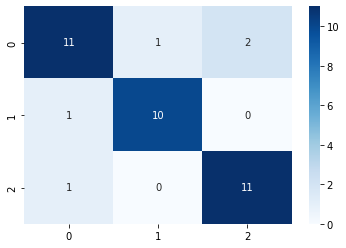

In [20]:
sns.heatmap(confusion_matrix(ytest, ypred2), annot=True,fmt="d",cmap='Blues')

## Support Vector Machines

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [22]:
model3=SVC(kernel = 'rbf', random_state = 0)
model3.fit(Xtrain,ytrain)
ypred3 = model3.predict(Xtest)
print(metrics.classification_report(ypred3,ytest))
print("\n\nAccuracy Score:", metrics.accuracy_score(ytest, ypred3).round(2)*100, "%")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



Accuracy Score: 100.0 %


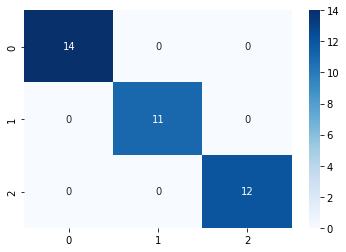

In [23]:
sns.heatmap(confusion_matrix(ytest, ypred3), annot=True,fmt="d",cmap='Blues')

####Random Forest


In [24]:
model4=RandomForestClassifier(n_estimators=100)
model4.fit(Xtrain,ytrain)
ypred4 = model4.predict(Xtest)
print(metrics.classification_report(ypred4,ytest))
print("\n\nAccuracy Score:", metrics.accuracy_score(ytest, ypred4).round(2)*100, "%")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



Accuracy Score: 100.0 %


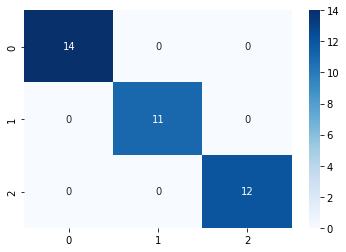

In [26]:
sns.heatmap(confusion_matrix(ytest, ypred4), annot=True,fmt="d",cmap='Blues')

####Neural Network

In [27]:
mean = Xtrain.mean(axis=0)
std = Xtrain.std(axis=0)
nn_xtrain = (Xtrain - mean) / std
nn_xtest = (Xtest - mean) / std
model5 = Sequential()
model5.add(Dense(128,input_shape=(7, ), activation='relu', name='dense_1'))
model5.add(Dense(64, activation='relu', name='dense_2'))
model5.add(Dense(1, activation='relu', name='dense_output'))
model5.summary()

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.fit(Xtrain, ytrain, epochs=100, batch_size=10)
ypred5 = model5.predict(Xtest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1024      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: -3.0024 - accuracy: 0.1438
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: -11.9161 - accuracy: 0.3630
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: -12.6539 - accuracy: 0.3767
Epoch 4/100
15/1

## Visualising The Result

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

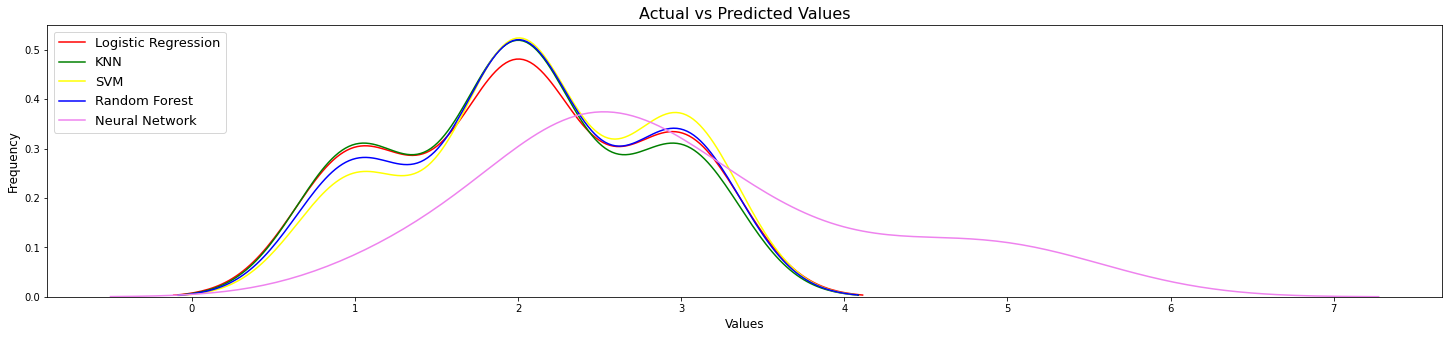

In [ ]:
plt.figure(figsize=(25,5))
sns.distplot(ypred1, hist = False, color = 'red', label = 'Logistic Regression')
sns.distplot(ypred2, hist = False, color = 'green', label = 'KNN')
sns.distplot(ypred3, hist = False, color = 'yellow', label = 'SVM')
sns.distplot(ypred4, hist = False, color = 'blue', label = 'Random Forest')
sns.distplot(ypred5, hist = False, color = 'violet', label = 'Neural Network')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)